In [196]:
import tensorflow

In [197]:
import numpy as np

# Load the saved files into variables
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [198]:
#Load the saved files into variables
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [199]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25102, 64, 64)
(6236, 64, 64)
(25102,)
(6236,)


In [200]:
x_train[4].shape

(64, 64)

In [201]:
label_to_int = {'angry': 0, 'happy': 1, 'sad':2, 'fearful':3, 'neutral':4}

def get_name(n):
    for emotion, label in label_to_int.items():
        if label == n:
            return emotion
    return "Label not found"  # Return a default value if label is not found


'neutral'

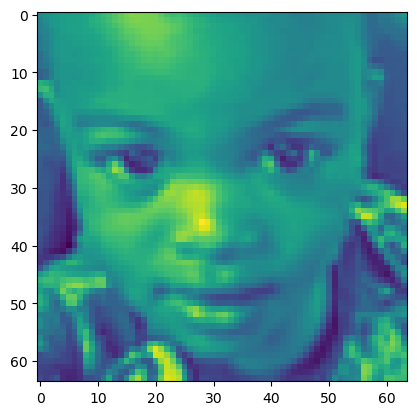

In [202]:
import matplotlib.pyplot as plt
plt.imshow(x_train[17034])
get_name(y_train[17034])

In [203]:
import cv2
import numpy as np

resized_images = []
for img in x_train:
    # Convert from RGB to BGR
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized = cv2.resize(img_bgr, (32, 32))
    grayscale_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    resized_images.append(grayscale_image)

x_train_resized = np.array(resized_images)

# Now x_train_resized contains the resized images with shape (25102, 32, 32)
print(x_train_resized.shape)

(25102, 32, 32)


In [211]:
resized_images = []
for img in x_test:
    # Convert from RGB to BGR
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized = cv2.resize(img_bgr, (32, 32))
    grayscale_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    resized_images.append(grayscale_image)

x_test_resized = np.array(resized_images)

# Now x_train_resized contains the resized images with shape (25102, 32, 32)
print(x_test_resized.shape)

error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [212]:
x_train = x_train_resized
x_test = x_test_resized

In [206]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25102, 32, 32)
(25102,)
(6236, 32, 32)
(6236,)


'neutral'

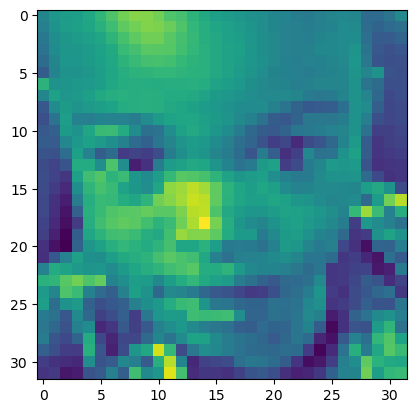

In [207]:
plt.imshow(x_train[17034])
get_name(y_train[17034])

In [208]:
import numpy as np 
x_train = x_train.reshape(-1, 32*32)
x_test = x_test.reshape(-1, 32*32)

In [209]:
x_train = x_train/255
x_test = x_test/255

In [210]:
x_train.shape

(25102, 1024)

In [157]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [161]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.regularizers import l1_l2
l1_reg = 0.001
l2_reg = 0.01

# model.add(Dense(units=612, input_shape=(1024, ), activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
# model.add(Dropout(0.3))
# model.add(Dense(units=306, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
# model.add(Dropout(0.2))
model.add(Dense(units=120, input_shape=(1024, ),activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.4))
model.add(Dense(units=60, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 153)               156825    
                                                                 
 dropout_15 (Dropout)        (None, 153)               0         
                                                                 
 dense_20 (Dense)            (None, 71)                10934     
                                                                 
 dropout_16 (Dropout)        (None, 71)                0         
                                                                 
 dense_21 (Dense)            (None, 5)                 360       
                                                                 
 dense_22 (Dense)            (None, 120)               720       
                                                                 
 dropout_17 (Dropout)        (None, 120)              

In [162]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [163]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(verbose=1, monitor='val_loss', patience=5)
history=model.fit(x_train, y_train, verbose=1, validation_data=(x_test, y_test), batch_size=20, epochs=50, callbacks=[callbacks])

Epoch 1/50
1256/1256 [==============================] - 5s 4ms/step - loss: 1.6944 - sparse_categorical_accuracy: 0.2866 - val_loss: 1.6066 - val_sparse_categorical_accuracy: 0.2845
Epoch 2/50
1256/1256 [==============================] - 5s 4ms/step - loss: 1.6058 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.6037 - val_sparse_categorical_accuracy: 0.2845
Epoch 3/50
1256/1256 [==============================] - 7s 5ms/step - loss: 1.6058 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.6055 - val_sparse_categorical_accuracy: 0.2845
Epoch 4/50
1256/1256 [==============================] - 6s 5ms/step - loss: 1.6054 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.6013 - val_sparse_categorical_accuracy: 0.2845
Epoch 5/50
1256/1256 [==============================] - 6s 5ms/step - loss: 1.6050 - sparse_categorical_accuracy: 0.2874 - val_loss: 1.6034 - val_sparse_categorical_accuracy: 0.2845
Epoch 6/50
1256/1256 [==============================] - 6s 5ms/step - loss: 1.6050 - spars

In [144]:
train_accuracy = history.history['sparse_categorical_accuracy']
test_accuracy = history.history['val_sparse_categorical_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

In [145]:
epochs = range(1, len(train_accuracy)+1)

In [146]:
epochs

range(1, 7)

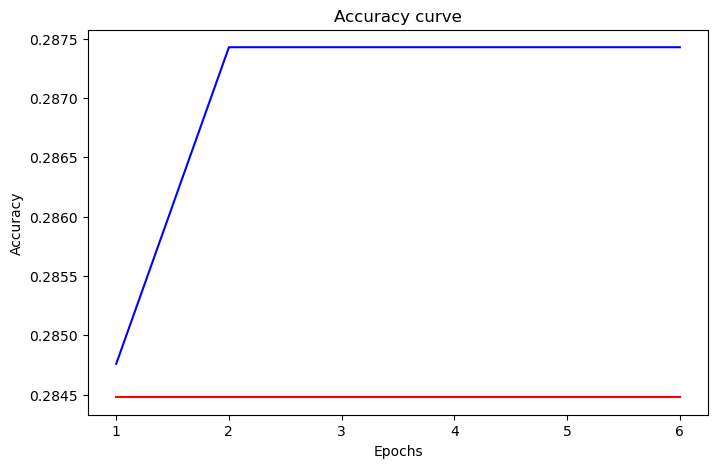

In [147]:
plt.figure(figsize=(8,5))
plt.plot(epochs, train_accuracy, 'b', label='Train Accuray')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.show()

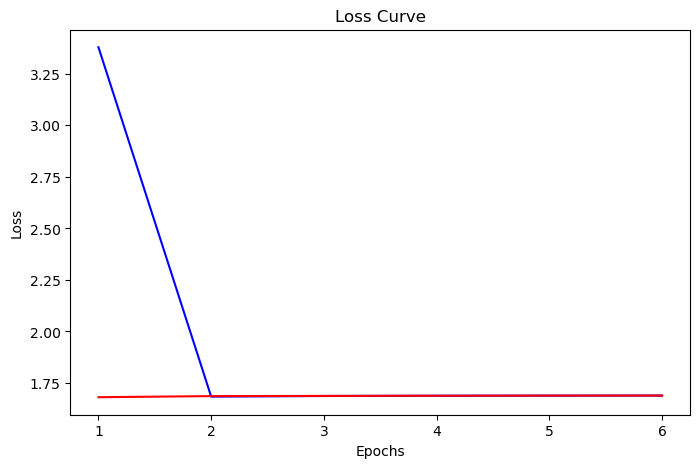

In [148]:
plt.figure(figsize=(8,5))
plt.plot(epochs, train_loss, 'b', label='Train Loss' )
plt.plot(epochs, test_loss, 'r', label='Train Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [149]:
loss, accuracy = model.evaluate(x_test, y_test)

195/195 [==============================] - 1s 3ms/step - loss: 1.6890 - sparse_categorical_accuracy: 0.2845


In [150]:
loss

1.6890370845794678

In [151]:
accuracy

0.28447723388671875

In [152]:
prediction= model.predict(x_test)

195/195 [==============================] - 0s 2ms/step


In [153]:
prediction

array([[0.15615821, 0.2868881 , 0.18488945, 0.17072585, 0.2013384 ],
       [0.15615821, 0.2868881 , 0.18488945, 0.17072585, 0.2013384 ],
       [0.15615821, 0.2868881 , 0.18488945, 0.17072585, 0.2013384 ],
       ...,
       [0.15615821, 0.2868881 , 0.18488944, 0.17072585, 0.2013384 ],
       [0.15615821, 0.2868881 , 0.18488944, 0.17072585, 0.2013384 ],
       [0.15615821, 0.2868881 , 0.18488944, 0.17072585, 0.2013384 ]],
      dtype=float32)

In [154]:
prediction.shape

(6236, 5)

In [155]:
prediction_values = np.argmax(prediction, axis=1)

In [156]:
prediction_values

array([1, 1, 1, ..., 1, 1, 1])

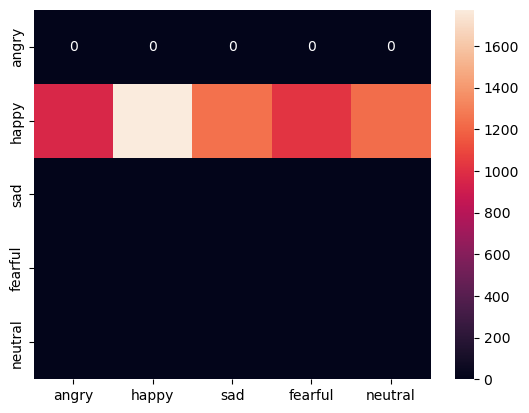

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(prediction_values, y_test)

import seaborn as sns 

sns.heatmap(cm, annot=True, xticklabels=label_to_int , yticklabels=label_to_int, fmt='d')

plt.show()